## How to use global Lagrangian eddy dataset (GLED v1.0)
We encourage users to use PYTHON for reading and visualizing this dataset

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# *eddy_info*
The general feature of eddies

In [67]:
df30 = pd.read_json('/data/home/liutongya/RCLV/data/GLEDv1.0new/eddyinfo/eddy_info_30d.json')
df90 = pd.read_json('/data/home/liutongya/RCLV/data/GLEDv1.0new/eddyinfo/eddy_info_90d.json')
df180 = pd.read_json('/data/home/liutongya/RCLV/data/GLEDv1.0new/eddyinfo/eddy_info_180d.json')

In [68]:
df30.head()

,id,date_start,duration,radius,cyc,center_lon,center_lat,dx,speed_x,dy,speed_y,vort,lavd,cd,ci
0,1993-01-01_030day_000001,1993-01-01,30,55.188311,-1,"[286.859375, 286.3567504883, 286.1399230957, 2...","[33.953125, 33.260559082, 33.0489311218, 32.86...",-82.246013,-0.031731,-121.479049,-0.046867,0.000022,0.000021,0.050752,-0.877023
1,1993-01-01_030day_000002,1993-01-01,30,68.096917,-1,"[59.921875, 59.7961425781, 60.1015586853, 60.7...","[-41.078125, -41.125919342, -41.2514038086, -4...",65.087282,0.025111,-59.110905,-0.022805,-0.000025,0.000024,0.079341,-0.511347
2,1993-01-01_030day_000003,1993-01-01,30,84.808323,-1,"[15.328125, 14.7080430984, 15.1562309265, 15.4...","[-36.296875, -35.9927330017, -36.0076370239, -...",10.585501,0.004084,-43.390131,-0.016740,-0.000023,0.000022,0.030506,0.163482
3,1993-01-01_030day_000004,1993-01-01,30,54.042031,-1,"[301.359375, 301.3267822266, 300.9379577637, 3...","[38.515625, 38.4245986938, 38.4283027649, 38.3...",-61.252594,-0.023631,-17.076861,-0.006588,0.000025,0.000021,0.026112,-0.328607
4,1993-01-01_030day_000005,1993-01-01,30,39.849386,1,"[150.078125, 150.1067047119, 150.7658996582, 1...","[-56.921875, -57.1972579956, -57.1831169128, -...",54.100711,0.020872,-35.992520,-0.013886,0.000024,0.000024,0.022594,-0.925656


In [9]:
# 30-day eddy number
df30.shape

(1095713, 15)

In [10]:
# 90-day eddy number
df90.shape

(116941, 15)

In [11]:
# 180-day eddy number
df180.shape

(13786, 15)

In [78]:
# search the 30-day eddy in July 2016

dftmp = df30[df30['date_start'] == '2016-01-01']
dftmp.head()

,id,date_start,duration,radius,cyc,center_lon,center_lat,dx,speed_x,dy,speed_y,vort,lavd,cd,ci
947999,2016-01-01_030day_000001,2016-01-01,30,25.648768,-1,"[288.984375, 288.7565002441, 288.5667114258, 2...","[35.140625, 35.1790657043, 35.193977356, 34.96...",-51.627686,-0.019918,-19.575251,-0.007552,0.000016,0.000047,0.099932,0.242243
948000,2016-01-01_030day_000002,2016-01-01,30,45.049008,-1,"[317.390625, 318.0808105469, 318.0866699219, 3...","[46.703125, 46.9496650696, 47.1558380127, 47.1...",16.853967,0.006502,53.676799,0.020709,0.000021,0.000028,0.099763,0.126160
948001,2016-01-01_030day_000004,2016-01-01,30,67.049681,1,"[16.859375, 16.8722763062, 16.9273014069, 17.2...","[-42.296875, -42.7256469727, -42.9316291809, -...",27.881610,0.010757,-96.384433,-0.037185,0.000028,0.000026,0.025823,-0.864511
948002,2016-01-01_030day_000005,2016-01-01,30,47.190446,-1,"[227.203125, 227.312789917, 227.4043121338, 22...","[-58.296875, -58.1903457642, -58.304725647, -5...",18.963148,0.007316,-26.698422,-0.010300,-0.000019,0.000022,0.083200,-0.397547
948003,2016-01-01_030day_000006,2016-01-01,30,55.777931,-1,"[34.734375, 34.9893722534, 35.2397003174, 35.4...","[-48.421875, -48.3030853271, -48.2508277893, -...",54.313809,0.020954,26.770107,0.010328,-0.000026,0.000027,0.009193,-0.075215


In [76]:
# the total number is 
dftmp.shape

(3498, 15)

Text(0.5, 1.0, 'Eddy generation site (dots) and radius (colors)')

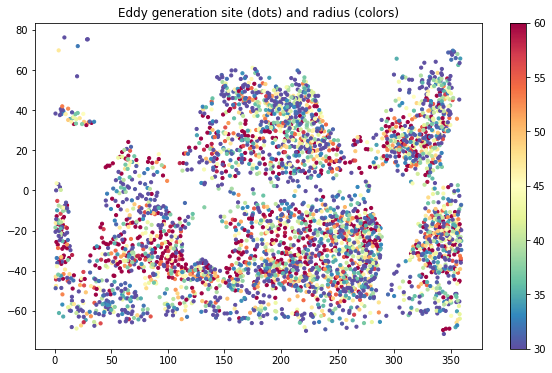

In [94]:
fig = plt.figure(figsize=(10, 6))
# the initial position of the eddy center
lon0 = [tmp[0] for tmp in dftmp['center_lon']]
lat0 = [tmp[0] for tmp in dftmp['center_lat']]

plt.scatter(lon0, lat0, c=dftmp.radius, s=10, vmin=30, vmax=60, cmap='Spectral_r')
plt.colorbar()
plt.title('Eddy generation site (dots) and radius (colors)')

# *eddy_traj*
The particle positions

In [35]:
# randomly select 3 eddies
import random
rand1 = random.sample(np.arange(df30.shape[0]).tolist(), 1)
rand2 = random.sample(np.arange(df90.shape[0]).tolist(), 1)
rand3 = random.sample(np.arange(df180.shape[0]).tolist(), 1)

In [36]:
# 30-day eddy
df30.iloc[rand1]

,id,date_start,duration,radius,cyc,center_lon,center_lat,dx,speed_x,dy,speed_y,vort,lavd,cd,ci
796413,2012-06-01_030day_000193,2012-06-01,30,26.91678,1,"[49.421875, 49.2997970581, 49.7679595947, 49.6...","[-50.734375, -51.7357215881, -52.0134620667, -...",14.345058,0.005534,-124.097057,-0.047877,0.000011,0.000015,0.099561,-0.414836


In [37]:
# match the nc file based on the eddy id
fn = '/data/home/liutongya/RCLV/data/GLEDv1.0new/eddytraj/30day/' + df30.iloc[rand1].id.item() + '.nc'
ds1 = xr.open_dataset(fn)
ds1

<xarray.Dataset>
Dimensions:  (time: 4, y0: 20, x0: 26)
Coordinates:
  * x0       (x0) float32 48.92 48.95 48.98 49.02 ... 49.61 49.64 49.67 49.7
  * y0       (y0) float32 -51.02 -50.98 -50.95 -50.92 ... -50.48 -50.45 -50.42
  * time     (time) int64 0 10 20 30
Data variables:
    x        (time, y0, x0) float32 ...
    y        (time, y0, x0) float32 ...
Attributes:
    Title:    Global Lagrangian Eddy Dataset (GLED v1.0)
    Eddy ID:  2012-06-01_030day_000193
    Creator:  Tongya Liu (liutongya@sio.org.cn)

Text(0.5, 1.0, 'Initial (blue) and final (red) position of the 30-day eddy')

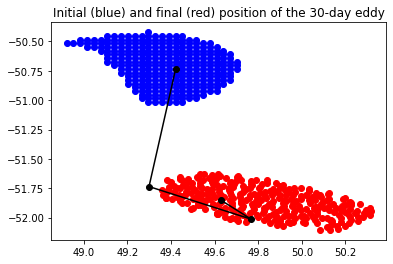

In [55]:
plt.scatter(ds1.x[0], ds1.y[0], color='b')

plt.scatter(ds1.x[-1], ds1.y[-1], color='r')

clon = df30.iloc[rand1].center_lon.item()
clat = df30.iloc[rand1].center_lat.item()
plt.plot(clon, clat, color='k', marker='o')

plt.title('Initial (blue) and final (red) position of the 30-day eddy')

In [21]:
# 90-day eddy
df90.iloc[rand2]

,id,date_start,duration,radius,cyc,center_lon,center_lat,dx,speed_x,dy,speed_y,vort,lavd,cd,ci
25779,2000-05-01_090day_000127,2000-05-01,90,46.818191,-1,"[345.828125, 345.6469116211, 345.306060791, 34...","[43.953125, 43.8587684631, 43.6538658142, 43.5...",-126.487296,-0.016266,-28.110924,-0.003615,0.000005,0.000005,0.099477,0.165616


In [45]:
fn = '/data/home/liutongya/RCLV/data/GLEDv1.0new/eddytraj/90day/' + df90.iloc[rand2].id.item() + '.nc'
ds2 = xr.open_dataset(fn)
ds2

<xarray.Dataset>
Dimensions:  (time: 10, y0: 21, x0: 25)
Coordinates:
  * time     (time) int64 0 10 20 30 40 50 60 70 80 90
  * x0       (x0) float32 234.9 235.0 235.0 235.0 ... 235.6 235.6 235.6 235.7
  * y0       (y0) float32 26.77 26.8 26.83 26.86 ... 27.3 27.33 27.36 27.39
Data variables:
    x        (time, y0, x0) float32 ...
    y        (time, y0, x0) float32 ...
Attributes:
    Title:    Global Lagrangian Eddy Dataset (GLED v1.0)
    Eddy ID:  2005-07-01_090day_000300
    Creator:  Tongya Liu (liutongya@sio.org.cn)

Text(0.5, 1.0, 'Initial (blue) and final (red) position of the 90-day eddy')

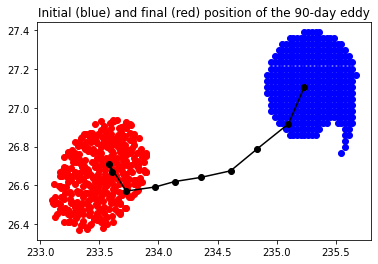

In [56]:
plt.scatter(ds2.x[0], ds2.y[0], color='b')

plt.scatter(ds2.x[-1], ds2.y[-1], color='r')

clon = df90.iloc[rand2].center_lon.item()
clat = df90.iloc[rand2].center_lat.item()
plt.plot(clon, clat, color='k', marker='o')

plt.title('Initial (blue) and final (red) position of the 90-day eddy')

In [57]:
# 180-day eddy
df180.iloc[rand3]

,id,date_start,duration,radius,cyc,center_lon,center_lat,dx,speed_x,dy,speed_y,vort,lavd,cd,ci
4059,2003-10-01_180day_000003,2003-10-01,180,64.107769,-1,"[110.296875, 110.0142745972, 109.8739089966, 1...","[-30.640625, -30.8968276978, -31.0732135773, -...",-328.702535,-0.021136,-213.11654,-0.013703,-0.000018,0.000011,0.064951,-0.961596


In [58]:
fn = '/data/home/liutongya/RCLV/data/GLEDv1.0new/eddytraj/180day/' + df180.iloc[rand3].id.item() + '.nc'
ds3 = xr.open_dataset(fn)
ds3

<xarray.Dataset>
Dimensions:  (time: 19, y0: 39, x0: 42)
Coordinates:
  * time     (time) int64 0 10 20 30 40 50 60 70 ... 120 130 140 150 160 170 180
  * y0       (y0) float32 -31.27 -31.23 -31.2 -31.17 ... -30.14 -30.11 -30.08
  * x0       (x0) float32 109.6 109.7 109.7 109.7 ... 110.8 110.9 110.9 110.9
Data variables:
    x        (time, y0, x0) float32 ...
    y        (time, y0, x0) float32 ...
Attributes:
    Title:    Global Lagrangian Eddy Dataset (GLED v1.0)
    Eddy ID:  2003-10-01_180day_000003
    Creator:  Tongya Liu (liutongya@sio.org.cn)

Text(0.5, 1.0, 'Particle positions every 10 days of the 180-day eddy')

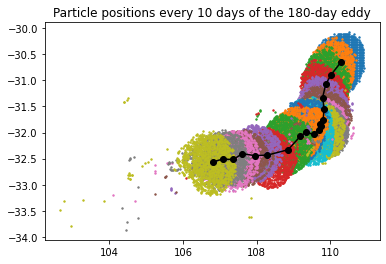

In [64]:
for i in np.arange(19):
    
    plt.scatter(ds3.x[i], ds3.y[i], s=2)

clon = df180.iloc[rand3].center_lon.item()
clat = df180.iloc[rand3].center_lat.item()
plt.plot(clon, clat, color='k', marker='o')
    
plt.title('Particle positions every 10 days of the 180-day eddy')